# 図示をする

## アンスコンべ（anscombe）の四重奏

散布図とanscombeのデータを見る．Rのもつデータセットの一つである．データ内容を一覧してみよう．xiとyiを組にして散布図を描かせてみる．

In [1]:
anscombe

x1,x2,x3,x4,y1,y2,y3,y4
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71
9,9,9,8,8.81,8.77,7.11,8.84
11,11,11,8,8.33,9.26,7.81,8.47
14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,8,7.24,6.13,6.08,5.25
4,4,4,19,4.26,3.10,5.39,12.50
12,12,12,8,10.84,9.13,8.15,5.56
7,7,7,8,4.82,7.26,6.42,7.91


x1とy1，x2とy2，．．．と対応させるとき，それぞれの散布図および相関係数に仕掛けのあるデータです．
相関係数を計算する関数はcorです．
ここでanscombeはデータフレイム（dataframe）と呼ばれる，Rの扱うデータ形式です．各列を参照するには「$」を挟んで名前をつづけます．

In [15]:
cor(anscombe$x1,anscombe$y1)
cor(anscombe$x2,anscombe$y2)
cor(anscombe$x3,anscombe$y3)
cor(anscombe$x4,anscombe$y4)

[1] 0.8164205

[1] 0.8162365

[1] 0.8162867

[1] 0.8165214

それぞの相関係数がほぼ同じになっていますね．同じデータフレイムから利用するときに，繰り返し書くのはめんどうなのを省略しましょう．
関数attachでデータフレイム名を指定しえおくと，省略できうrのです．

In [17]:
attach(anscombe)

The following objects are masked from anscombe (pos = 4):

    x1, x2, x3, x4, y1, y2, y3, y4



In [18]:
cor(x1,y1)
cor(x2,y2)
cor(x3,y3)
cor(x4,y4)

[1] 0.8164205

[1] 0.8162365

[1] 0.8162867

[1] 0.8165214

次に散布図を描かせてみます．
散布図には関数plotを使います．

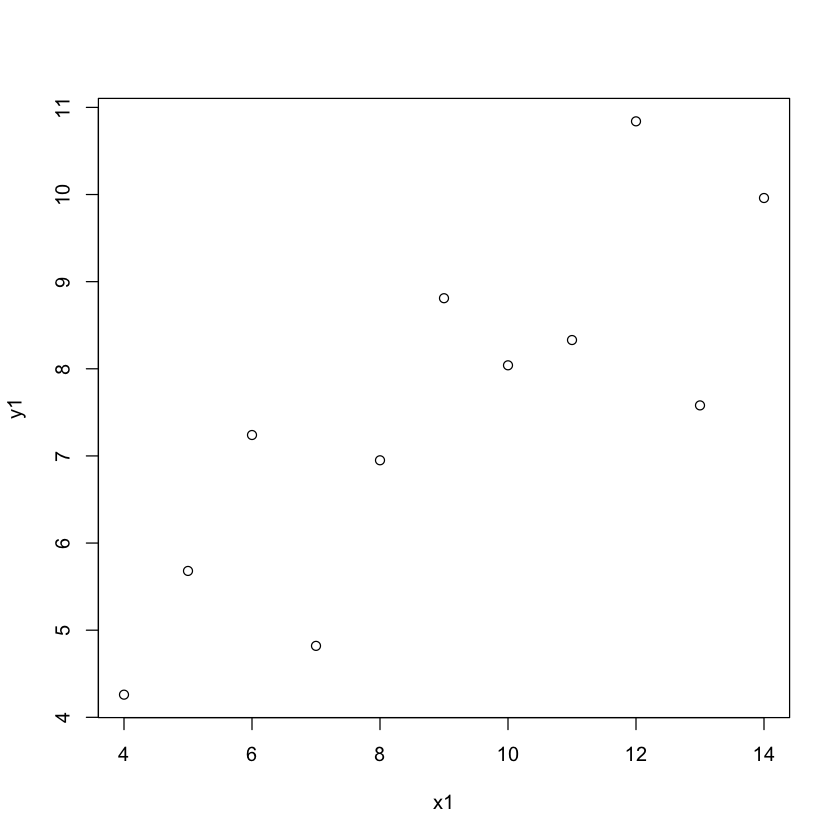

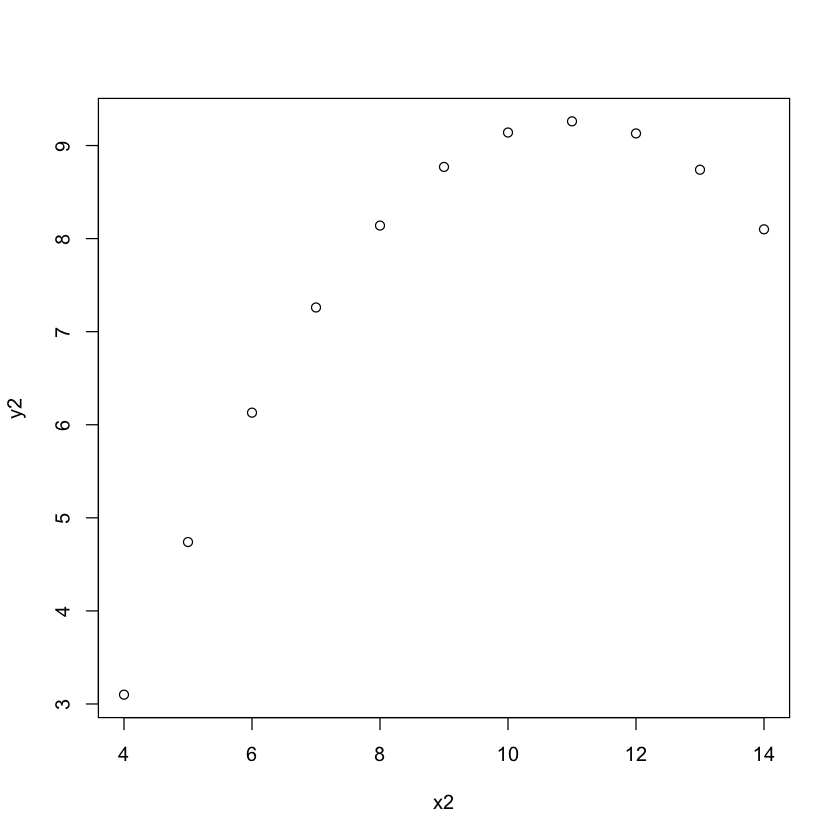

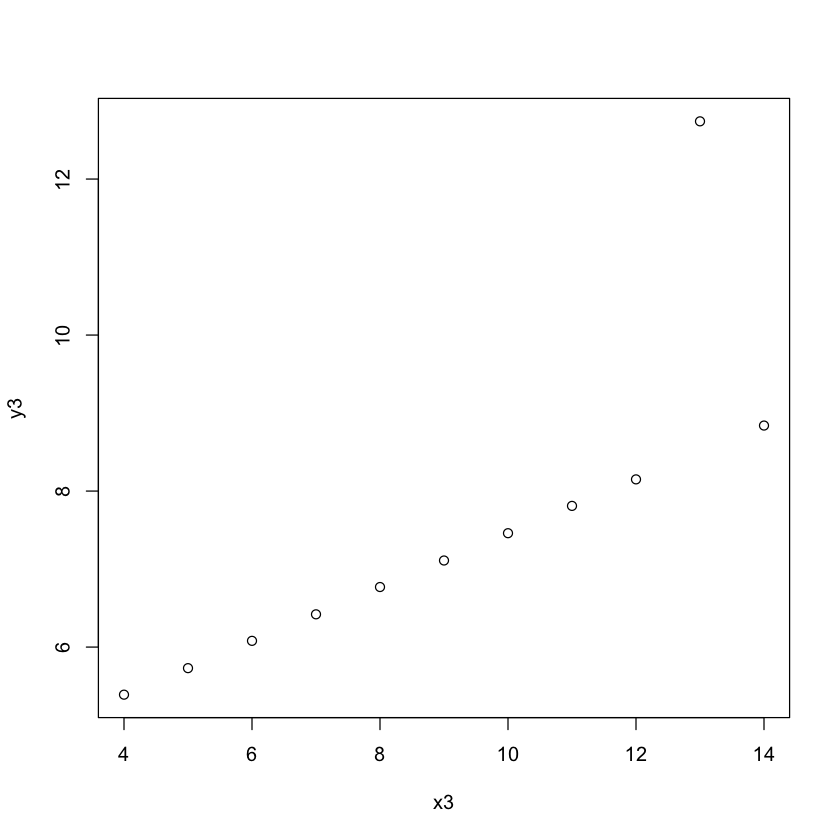

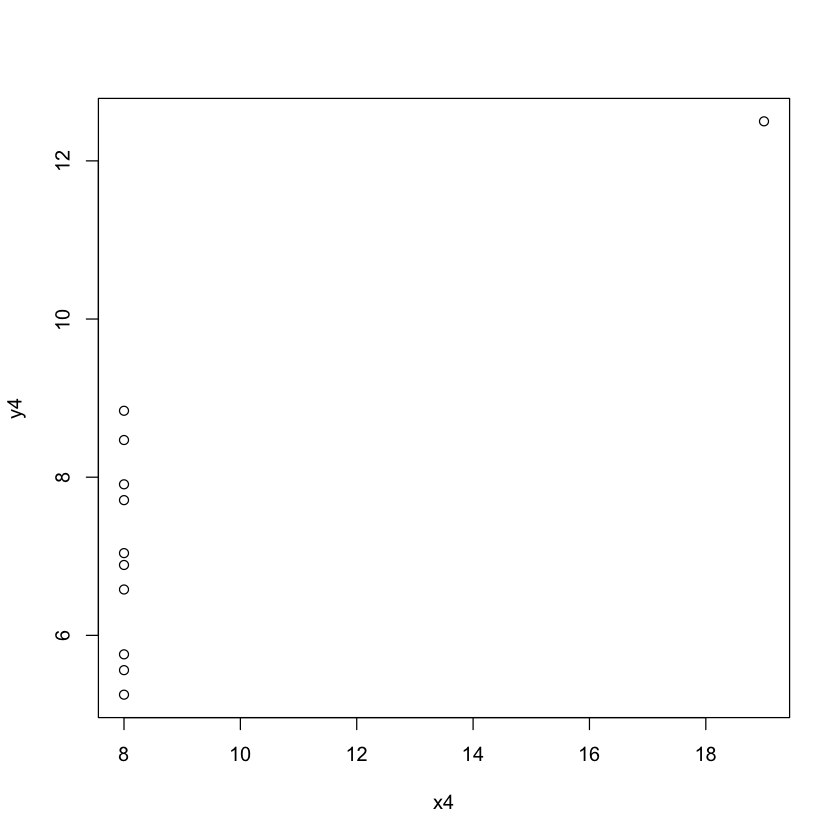

In [19]:
plot(x1,y1)
plot(x2,y2)
plot(x3,y3)
plot(x4,y4)

4つの散布図を比較したいのですが，このままでは比較しにくいですね．
関数parを使うとまとめて並べることができます．
ここでは田の字形，つまり2x2に並べる指定です．
mfrowの右辺の数字の組み合わせでいろいろな並べ方ができます．
相関係数が同じでも多様な散布図から得られることがわかります．
数量的指標だけでなくグラフも必ず描かせてみましょう．

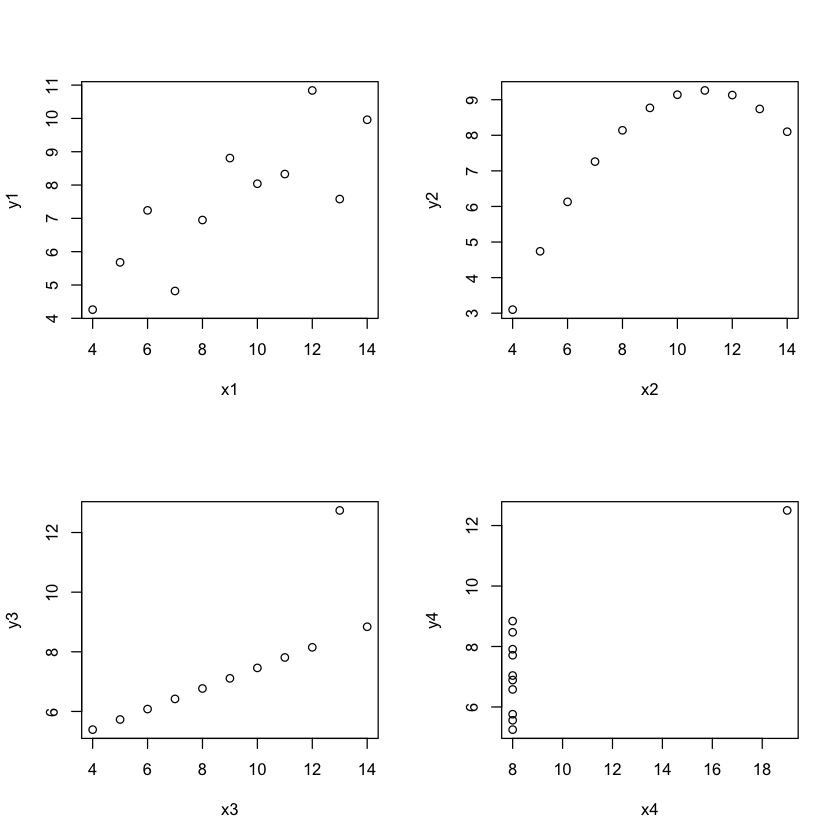

In [26]:
par(mfrow=c(2,2))
plot(x1,y1)
plot(x2,y2)
plot(x3,y3)
plot(x4,y4)

## 例題：グラフなどからわかること

ここでは山田剛史他『Rによるやさしい統計学』（オーム社）第11章の例題をもとに分析例を説明します．
小テストで分析からわかることを確認してください．
サンプルデータは次の通りであり，xは子供のゲーム時間，yはその親の認識するゲーム時間を表しています．

In [39]:
x<-c(290,50,80,100,200,350,430,80,210,110,70,260,220,330,170,420,80,300,290,230)
y<-c(350,70,100,130,250,430,520,100,260,140,90,320,270,400,210,510,100,370,350,280)

散布図およびヒストグラムを描かせてみます．

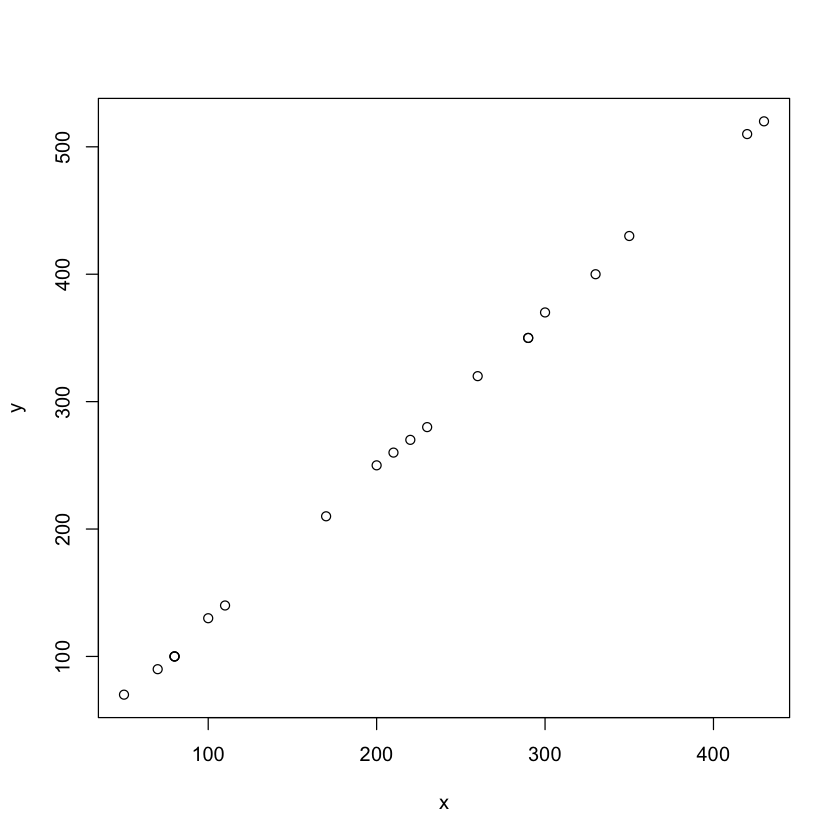

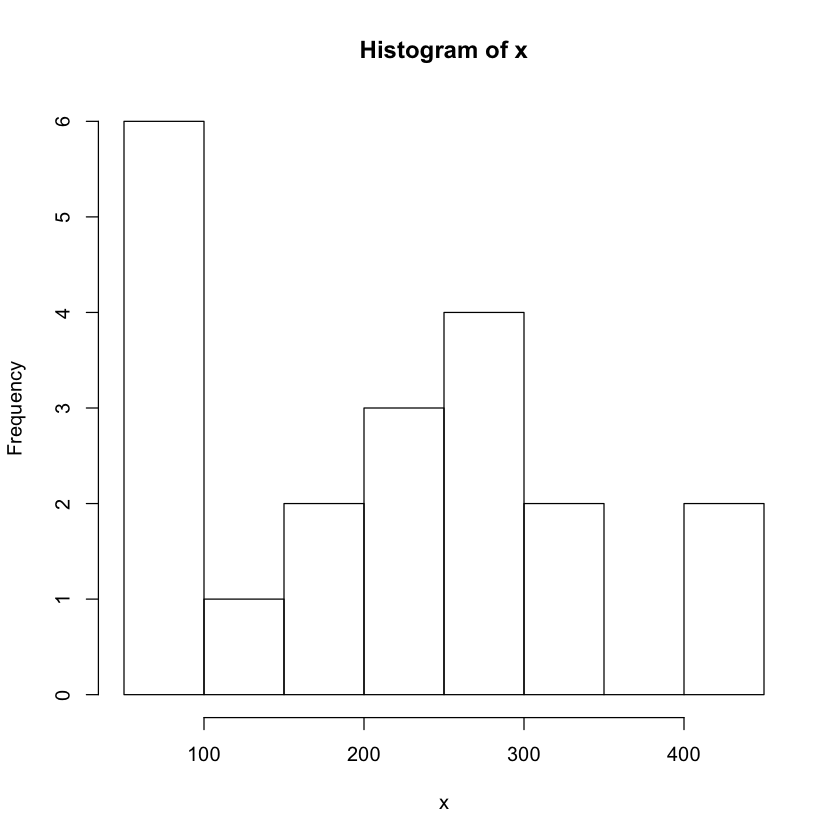

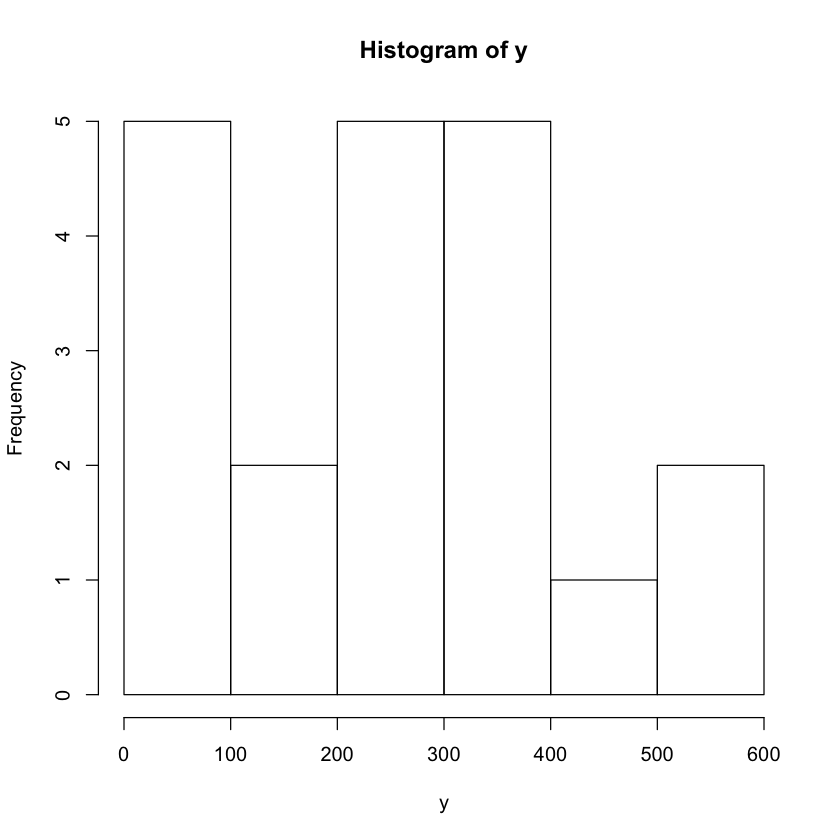

In [40]:
plot(x,y)
hist(x)
hist(y)

ヒストグラムを比較しやすくするために2つ並べてみます．

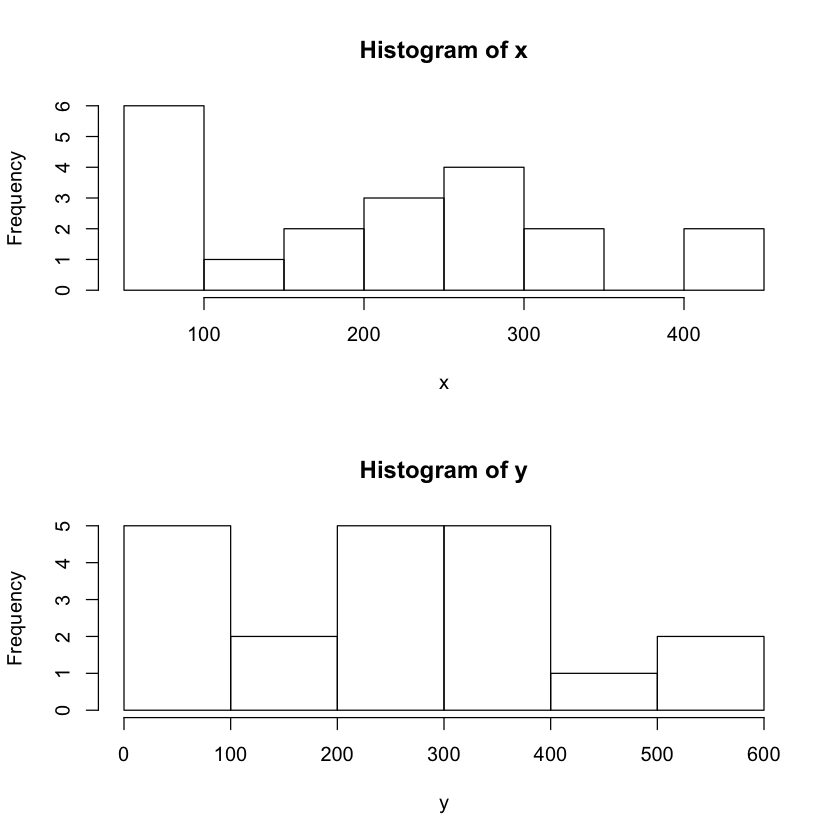

In [41]:
par(mfrow=c(2,1))
hist(x)
hist(y)

並べてみると，横軸の範囲が揃っていないので比較しにくくなっています．
これを揃えましょう．
x軸の指定を自動で行うにはbreaksを使います．

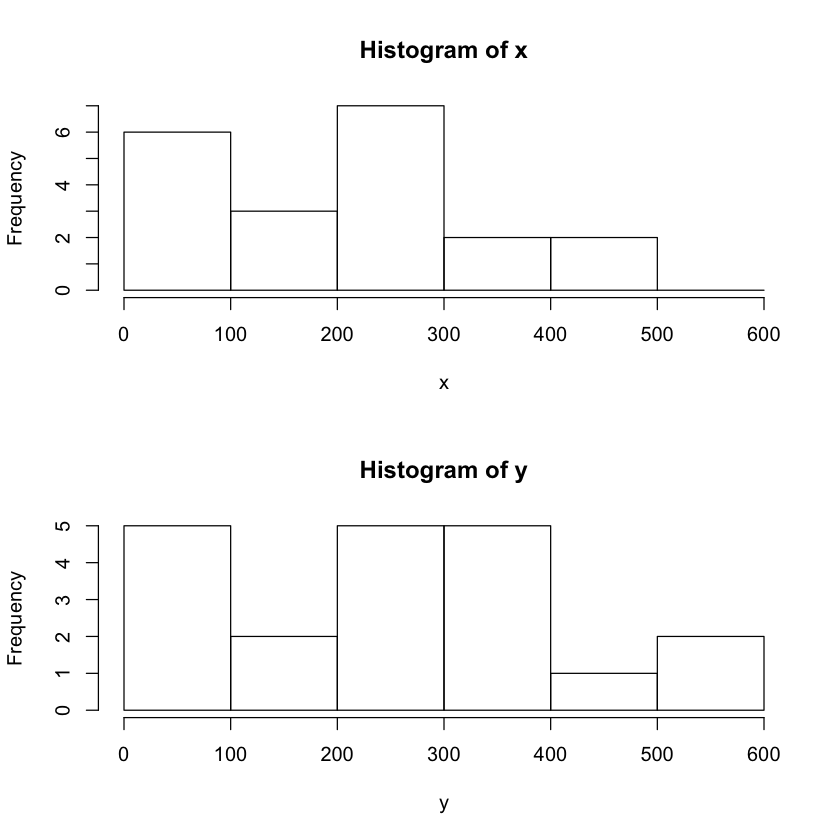

In [42]:
yoko<-seq(0,600,100)
par(mfrow=c(2,1))
hist(x,breaks=yoko)
hist(y,breaks=yoko)

縦軸の目盛りも揃っていません．
それも揃えましょう．
ylimを使います．

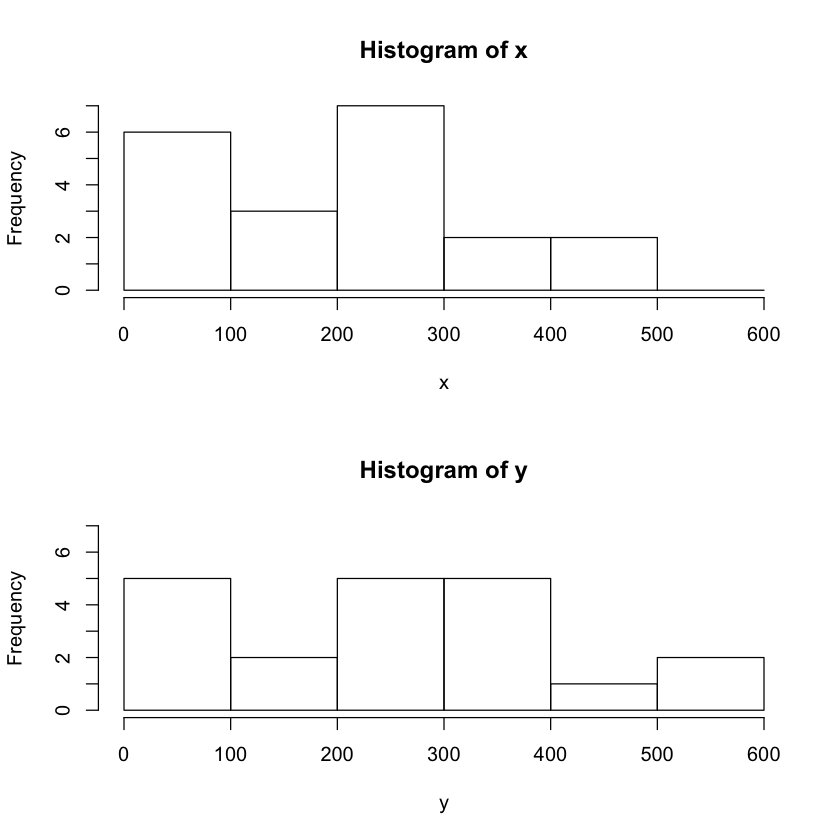

In [43]:
yoko<-seq(0,600,100)
par(mfrow=c(2,1))
hist(x,breaks=yoko,ylim=c(0,7))
hist(y,breaks=yoko,ylim=c(0,7))

総じてyのほうがxより大きく見えます．
それを直接にデータ化してみましょう．

[1] 60 20 20 30 50 80 90 20 50 30 20 60 50 70 40 90 20 70 60 50

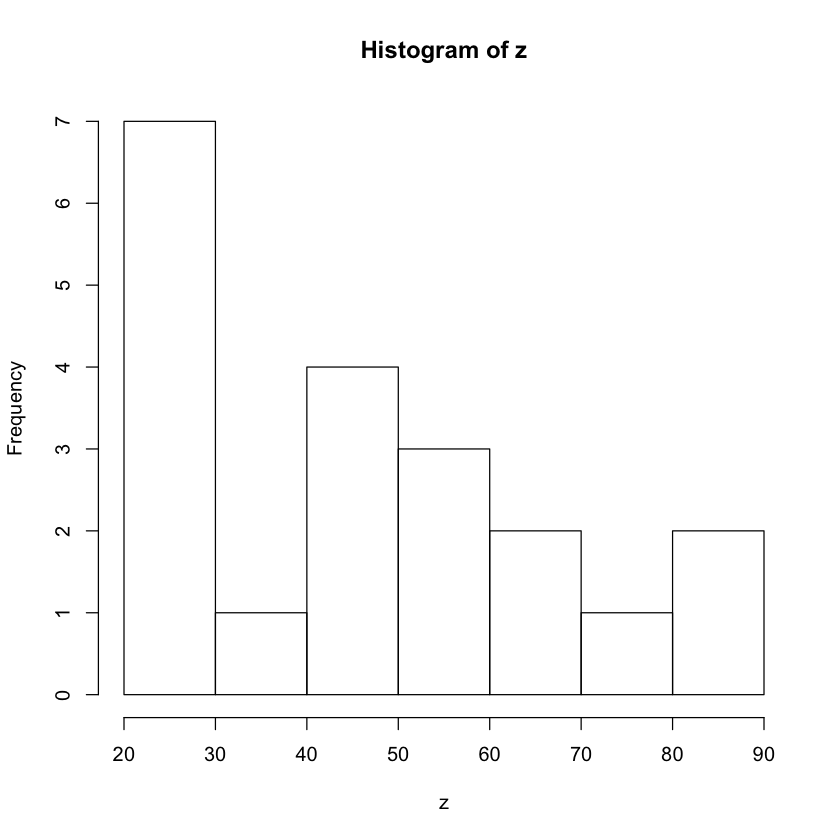

In [44]:
z<-y-x
z
hist(z)

散布図および回帰直線を描かせてみましょう．

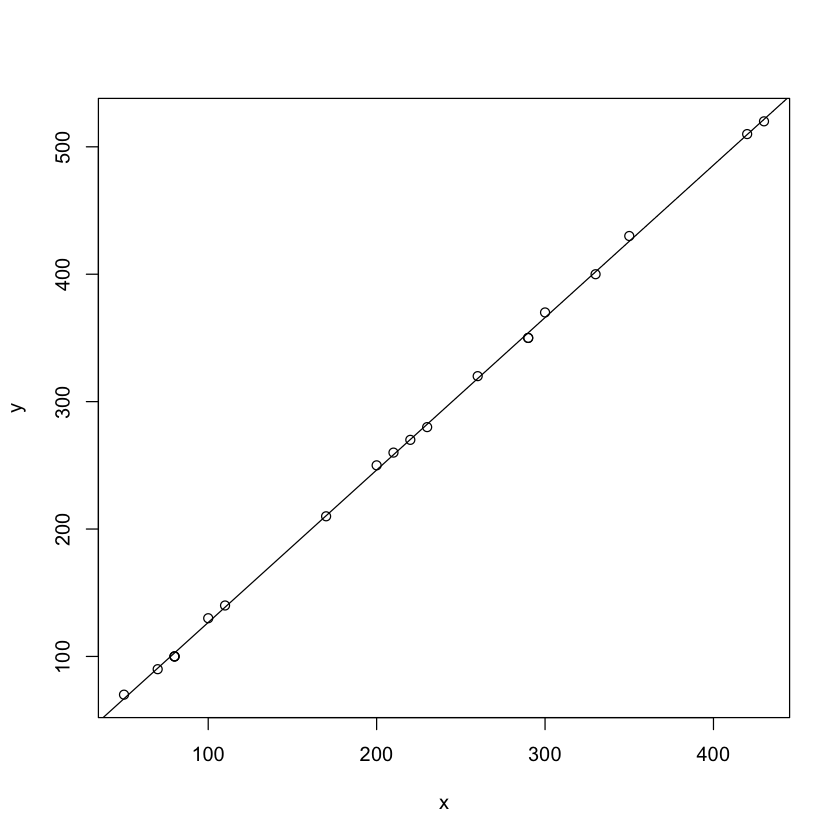

In [45]:
kaiki<-lm(y~x)
plot(x,y)
abline(kaiki)

最後に親の認識時間は10歳のゲーム時間より長いのかt検定で確かめておきましょう．

In [46]:
t.test(x,y)


	Welch Two Sample t-test

data:  x and y
t = -1.1789, df = 36.835, p-value = 0.246
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -133.22647   35.22647
sample estimates:
mean of x mean of y 
    213.5     262.5 


p値は4分の1ぐらいと，そんなに小さくありません．
親子の認識の差は，検定により明らかに親の認識時間が長いというほどのことはないようです．
小テスト問題では以上の図示からわかること，わからないことを問います．
以上の他に，平均や中央値なども求める必要があります．